# Cohort Analysis : Customer Retention & Revenue Performance on The Look

## Pengenalan Bisnis

<b>The Look</b> merupakan platform e-commerce yang menyediakan berbagai produk fashion dengan harga yang kompetitif serta melayani konsumen berbasis internasional. Untuk mendukung operasional globalnya, The Look menyediakan fitur international shipping & delivery serta order cancellation guna meningkatkan kenyamanan pengguna dalam bertransaksi.

## Stakeholder

<b><i>Tim Marketing The Look</b></i> menyadari bahwa keberhasilan platform e-commerce tidak hanya ditentukan oleh jumlah pelanggan yang kembali bertransaksi, tetapi juga oleh kemampuan perusahaan dalam menjaga kontribusi pendapatan dari setiap cohort pelanggan. Tingkat retensi pelanggan yang tinggi belum tentu mencerminkan keberlanjutan pendapatan apabila nilai transaksi pelanggan menurun setelah pembelian awal. Oleh karena itu, diperlukan analisis cohort revenue retention untuk memahami pola kontribusi pendapatan pelanggan sejak transaksi pertama mereka.

## Rumusan Masalah

Bagaimana pola retensi pelanggan dan revenue retention pada setiap cohort pelanggan The Look selama periode 2019–2024, serta cohort mana yang menunjukkan performa retensi dan kontribusi pendapatan paling berkelanjutan untuk mendukung strategi pertumbuhan bisnis?

*Tujuan*

1. Menganalisis pola revenue retention dari setiap cohort pelanggan The Look periode 2019–2024.

1. Mengidentifikasi cohort pelanggan dengan kontribusi pendapatan paling berkelanjutan dalam jangka panjang.

1. Mengevaluasi perubahan tren revenue retention pada periode sebelum, selama, dan setelah pandemi.

1. Memberikan insight berbasis data untuk mendukung keputusan bisnis terkait strategi retensi dan promosi.

## Penjelasan DataSheet

Dataset ini mencakup data transaksi pelanggan pada platform e-commerce The Look dalam rentang waktu Januari 2019 hingga Januari 2024.

## Import Module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)

## Load Datasheet

Pada tahap ini, saya mengimpor dataset order_items.csv ke dalam dataframe Pandas agar bisa diproses lebih lanjut.

In [2]:
df=pd.read_csv('order_items.csv')
df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [3]:
## Cek Struktur Dataset
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181759 non-null  int64  
 1   order_id           181759 non-null  int64  
 2   user_id            181759 non-null  int64  
 3   product_id         181759 non-null  int64  
 4   inventory_item_id  181759 non-null  int64  
 5   status             181759 non-null  object 
 6   created_at         181759 non-null  object 
 7   shipped_at         118281 non-null  object 
 8   delivered_at       63841 non-null   object 
 9   returned_at        18232 non-null   object 
 10  sale_price         181759 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 15.3+ MB


Index(['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price'],
      dtype='object')

In [4]:
df.isna().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

Tahap ini dilakukan untuk memastikan semua kolom tanggal memiliki format datetime yang konsisten. Di dataset ini, nilai tanggal memiliki tambahan timezone <i><b>+00:00</b></i>, sehingga saya menghapusnya menggunakan regex agar parsing datetime lebih mudah dan bersih.

In [5]:
df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']] = (
    df[['created_at', 'shipped_at', 'delivered_at', 'returned_at']]
    .apply(lambda x: x.str.replace(r'\+00:00', '', regex=True))
    .apply(lambda x : pd.to_datetime(x, format='mixed'))
)

Cek kembali apakah type data sudah berubah menjadi datetime

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181759 entries, 0 to 181758
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 181759 non-null  int64         
 1   order_id           181759 non-null  int64         
 2   user_id            181759 non-null  int64         
 3   product_id         181759 non-null  int64         
 4   inventory_item_id  181759 non-null  int64         
 5   status             181759 non-null  object        
 6   created_at         181759 non-null  datetime64[ns]
 7   shipped_at         118281 non-null  datetime64[ns]
 8   delivered_at       63841 non-null   datetime64[ns]
 9   returned_at        18232 non-null   datetime64[ns]
 10  sale_price         181759 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int64(5), object(1)
memory usage: 15.3+ MB


## Tahapan Exploratory Data Analysis & Data Cleansing

Pada tahap EDA dan Data Cleansing, kami melakukan proses standarisasi tipe data agar dataset lebih siap untuk dianalisis, khususnya untuk kebutuhan cohort analysis.

Dengan tahap ini, dataset menjadi lebih bersih dan optimal untuk digunakan pada tahap berikutnya, yaitu menentukan cohort dan menghitung retention berdasarkan aktivitas user dari waktu ke waktu.

In [7]:
df['status'] = pd.Categorical(df['status'], ['Cancelled', 'Processing', 'Shipped', 'Returned', 'Complete'])

for col in ['id', 'order_id', 'user_id', 'product_id', 'inventory_item_id']:
    df[col] = df[col].astype('category')

In [8]:
## melihat ringkasan statistik dataset
df.describe()

,created_at,shipped_at,delivered_at,returned_at,sale_price
count,181759,118281,63841,18232,181759.000000
mean,2022-10-24 17:46:02.968706816,2022-10-25 03:35:10.066188544,2022-10-27 23:47:53.183116032,2022-10-30 23:01:59.265073920,59.568544
min,2019-01-06 02:25:41,2019-01-09 04:36:00,2019-01-18 04:47:00,2019-01-21 03:46:00,0.020000
25%,2022-02-24 10:16:22,2022-02-25 15:28:00,2022-02-28 12:39:00,2022-02-28 08:49:15,24.500000
50%,2023-02-21 01:19:27,2023-02-21 03:39:00,2023-02-24 23:08:00,2023-03-03 05:18:00,39.990002
75%,2023-09-27 03:51:44.500000,2023-09-27 19:19:00,2023-09-30 04:30:00,2023-10-03 20:22:15,69.949997
max,2024-01-21 18:02:23.533893,2024-01-20 17:57:00,2024-01-24 22:14:42.220676,2024-01-27 05:16:19.046968,999.000000
std,NaN,NaN,NaN,NaN,66.657262


Dari hasil deskriptif statistik, dataset terdiri dari 181.759 baris transaksi dengan rentang waktu dari Januari 2019 hingga Januari 2024 berdasarkan kolom created_at. Kolom utama untuk cohort seperti user_id dan created_at lengkap tanpa missing value. Nilai transaksi (sale_price) memiliki median sekitar 39.99 dan maksimum hingga 999, menunjukkan adanya transaksi bernilai tinggi yang memengaruhi rata-rata.

## Penghitungan Jumlah Order Berdasarkan Kolom Status dan Visualisasinya

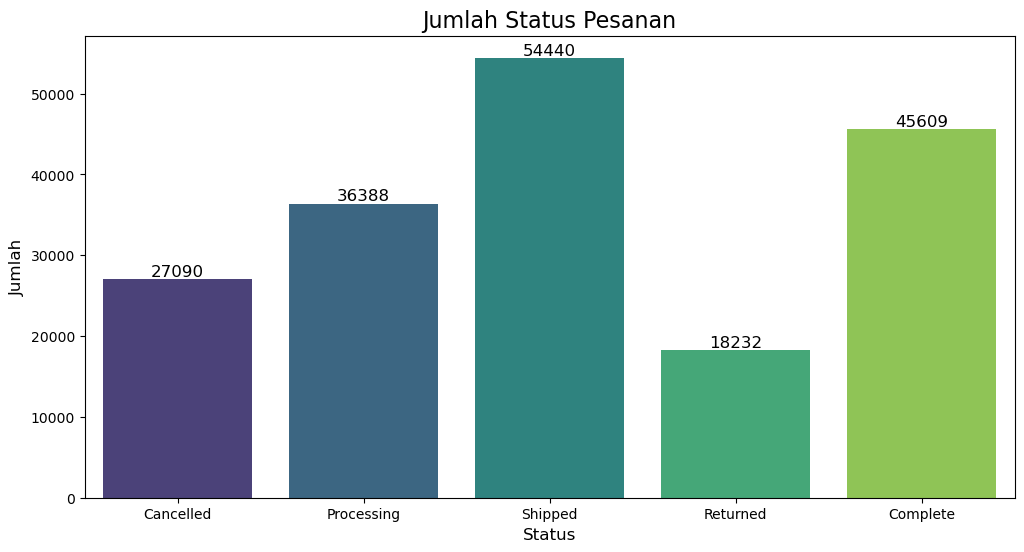

In [9]:
# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Membuat grafik batang (bar chart) untuk menghitung jumlah data pada setiap kategori
ax = sns.countplot(df, x='status', palette = 'viridis') 
for p in ax.patches:
    if p.get_height() > 0: #Jumlah transaksi lebih dari nol beri anotasi angka
        ax.text(
            p.get_x() + p.get_width() / 2, # x Coordinate
            p.get_height() + 900, # y Coordinate
            int(p.get_height()), #Supaya angka yang ditampilkan bilangan bulat
            ha="center", 
            va="center", 
            fontsize=12, 
            color="black", 
        )

plt.title('Jumlah Status Pesanan', fontsize = 16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.show()

In [10]:
# shows status of order
display(df['status'].value_counts())


status
Shipped       54440
Complete      45609
Processing    36388
Cancelled     27090
Returned      18232
Name: count, dtype: int64

Grafik ini menunjukkan bahwa status pesanan dalam dataset terbagi menjadi 5 kategori, dengan jumlah terbesar pada status Shipped dan Complete. Hal ini mengindikasikan bahwa transaksi valid untuk analisis cohort cukup banyak, namun masih terdapat transaksi yang sedang berjalan (Processing dan Shipped) serta transaksi yang tidak berhasil (Cancelled dan Returned).

## Membuat Grafik Validasi Jumlah Order Berdasarkan Tahapan

,created_at,shipped_at,delivered_at,returned_at
status,,,,
Cancelled,27090,0,0,0
Processing,36388,0,0,0
Shipped,54440,54440,0,0
Returned,18232,18232,18232,18232
Complete,45609,45609,45609,0


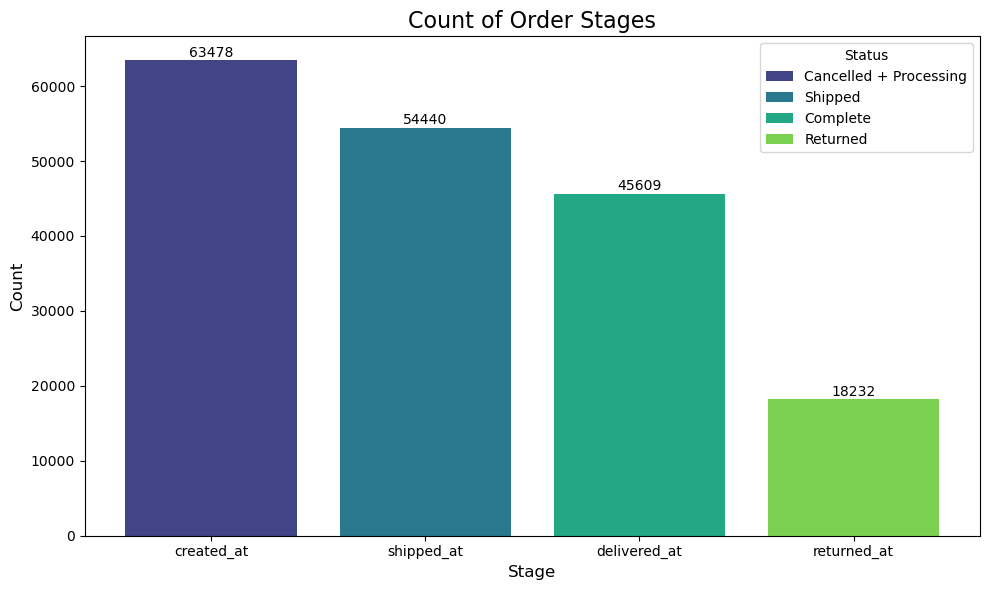

In [11]:
# checking order timestamp based on order status
display(df.groupby('status')[['created_at', 'shipped_at', 'delivered_at', 'returned_at']].count())

# creating a long dataframe to  setup the plot
df_long = pd.melt(df.groupby('status')[['created_at', 'shipped_at', 'delivered_at', 'returned_at']].count().reset_index(), id_vars="status", var_name="stage", value_name="count")

# Define the rules for filtering
rules = {
    "Cancelled": ["created_at"],
    "Processing": ["created_at"],
    "Shipped": ["shipped_at"],
    "Returned": ["returned_at"],
    "Complete": ["delivered_at"]
}

# Apply the filtering logic
df_long = df_long[df_long.apply(lambda row: row["stage"] in rules.get(row["status"], []), axis=1)]
        
# Preprocess the data to stack 'Cancelled' and 'Processing'
stacked_data = df_long[df_long["status"].isin(["Cancelled", "Processing"])]
stacked_sum = stacked_data.groupby("stage", as_index=False).agg({"count": "sum"})
stacked_sum["status"] = "Cancelled + Processing"

# Keep the other statuses separate
other_data = df_long[~df_long["status"].isin(["Cancelled", "Processing"])]

# Combine the data
final_data = pd.concat([stacked_sum, other_data])

# Define color palette using 'viridis'
palette = sns.color_palette("viridis", n_colors=len(final_data["status"].unique()))
status_colors = dict(zip(final_data["status"].unique(), palette))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = {}

# Iterate through stages to stack the data
for stage in final_data["stage"].unique():
    stage_data = final_data[final_data["stage"] == stage]
    bottom = 0
    for _, row in stage_data.iterrows():
        bars[row["status"]] = ax.bar(
            stage, row["count"], label=row["status"], bottom=bottom,  color=status_colors[row["status"]]
        )
        bottom += row["count"]  # Stack the bars

# Add text annotations to show the counts
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + 1000,  # y-coordinate (slightly above the bar)
            int(p.get_height()),  # Text value (cast as int to remove decimals)
            ha="center",  # Horizontal alignment
            va="center",  # Vertical alignment
            fontsize=10,  # Font size
            color="black",  # Text color
        )

# Customize the plot
plt.title("Count of Order Stages", fontsize=16)
plt.xlabel("Stage", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Status", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

## Membuat Visualisasi Proporsi Status Order Menggunakan Pie Chart

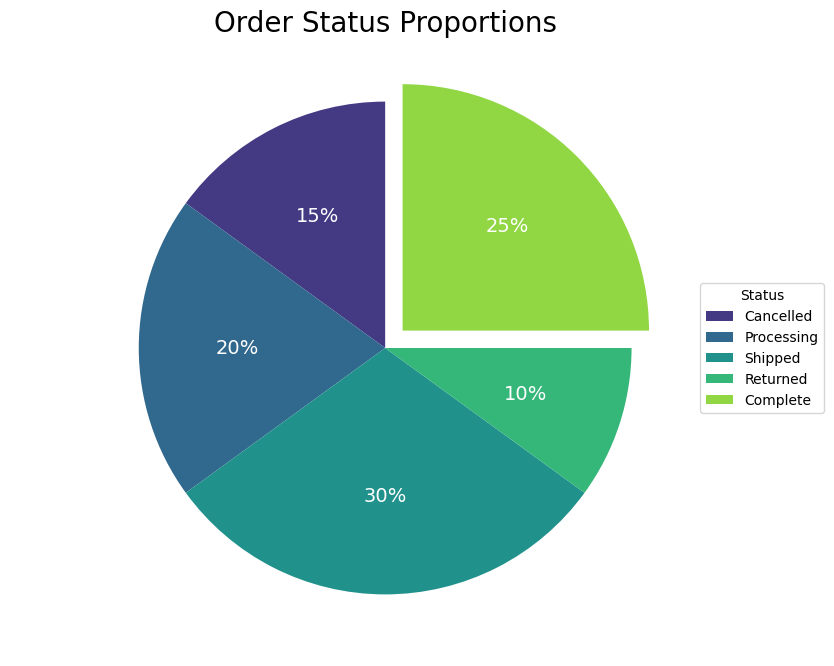

In [12]:
df_stacked = pd.DataFrame(df.groupby('status')['created_at'].count().reset_index()).rename(columns={'status':'status', 'created_at':'count'})

df_stacked['count_%'] = round(df_stacked['count']/df_stacked['count'].sum(),2)


# Prepare data for the pie chart
labels = df_stacked['status']
sizes = df_stacked['count_%']

# Define a color palette using seaborn
colors = sns.color_palette("viridis", len(labels))

# Define explode values to highlight the "Complete" section
explode = [0, 0, 0, 0, 0.1]  # Only "Complete" is exploded

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.0f}%', startangle=90, colors=colors,
       textprops={'color': 'white', 'fontsize': 14}, explode = explode)

# Set title
plt.title('Order Status Proportions', fontsize = 20)

# add legend
plt.legend(labels, title="Status", loc="center left", bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

In [13]:
# checking for anomalities in the shipped at date
df.loc[df['shipped_at'].dt.date < df['created_at'].dt.date, ['status', 'created_at', 'shipped_at', 'delivered_at']].head(10)

,status,created_at,shipped_at,delivered_at
5,Shipped,2023-09-19 09:13:08.000000,2023-09-16 09:24:00.000000,NaT
7,Complete,2022-04-01 13:25:52.000000,2022-03-31 05:13:00.000000,2022-04-02 22:18:00.000000
19,Shipped,2021-02-27 03:16:44.000000,2021-02-25 19:08:00.000000,NaT
28,Returned,2023-05-15 02:22:01.000000,2023-05-14 18:35:00.000000,2023-05-18 21:12:00.000000
32,Complete,2024-01-17 03:54:46.754527,2024-01-15 10:04:24.754527,2024-01-19 05:05:24.754527
36,Complete,2023-04-18 01:05:54.000000,2023-04-14 04:16:00.000000,2023-04-14 13:04:00.000000
37,Complete,2023-10-08 12:48:46.000000,2023-10-04 17:41:00.000000,2023-10-07 21:58:00.000000
44,Shipped,2024-01-19 15:33:14.154062,2024-01-17 21:39:25.154062,NaT
51,Complete,2022-06-30 23:36:20.000000,2022-06-29 16:39:00.000000,2022-07-01 12:46:00.000000
65,Shipped,2022-06-15 12:54:18.000000,2022-06-13 06:16:00.000000,NaT


status
Shipped       14014
Complete      11921
Returned       4714
Cancelled         0
Processing        0
Name: count, dtype: int64

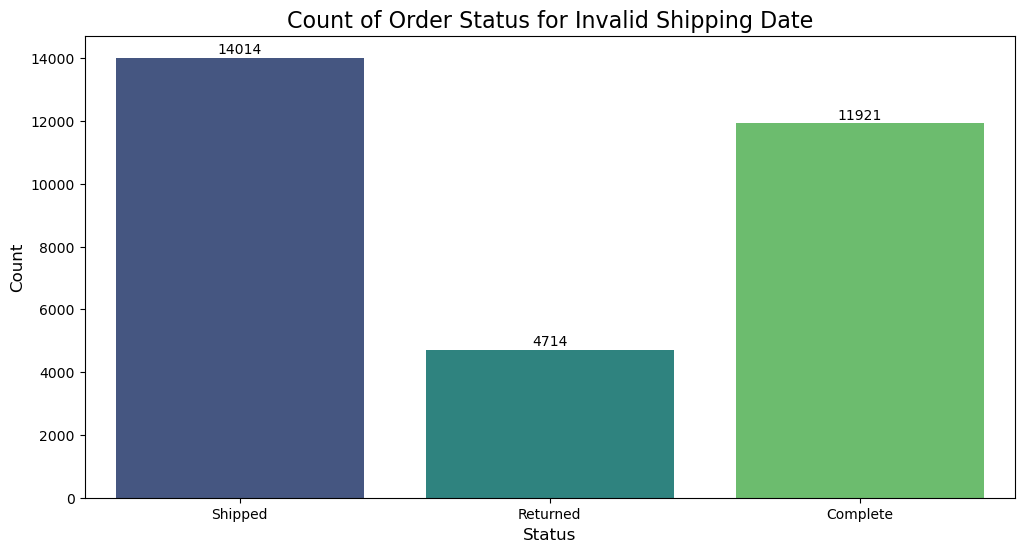

In [14]:
# check for the proportion of status in shipping dates smaller than creation dates
display(df[df['shipped_at'].dt.date < df['created_at'].dt.date]['status'].value_counts())

# Filter the dataframe to include only rows where 'shipped_at' < 'created_at'
filtered_df = df[df['shipped_at'].dt.date < df['created_at'].dt.date]
filtered_df['status'] = pd.Categorical(filtered_df['status'], ['Shipped', 'Returned', 'Complete'])

# # Set up the plot
plt.figure(figsize=(12, 6))

ax = sns.countplot(filtered_df, x='status', palette = 'viridis')

# Add text annotations to show the counts
for p in ax.patches:
    if p.get_height() > 0:  # Only annotate non-zero bars
        ax.text(
            p.get_x() + p.get_width() / 2,  # x-coordinate
            p.get_height() + 250,  # y-coordinate (slightly above the bar)
            int(p.get_height()),  # Text value (cast as int to remove decimals)
            ha="center",  # Horizontal alignment
            va="center",  # Vertical alignment
            fontsize=10,  # Font size
            color="black",  # Text color
        )

plt.title('Count of Order Status for Invalid Shipping Date', fontsize = 16)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

In [15]:
# filter out rows with shipped at date lower than created at
df = df[df['shipped_at'].dt.date >= df['created_at'].dt.date]

# filter df based on order status complete
df = df[df['status'] == 'Complete']
df.shape

(33688, 11)

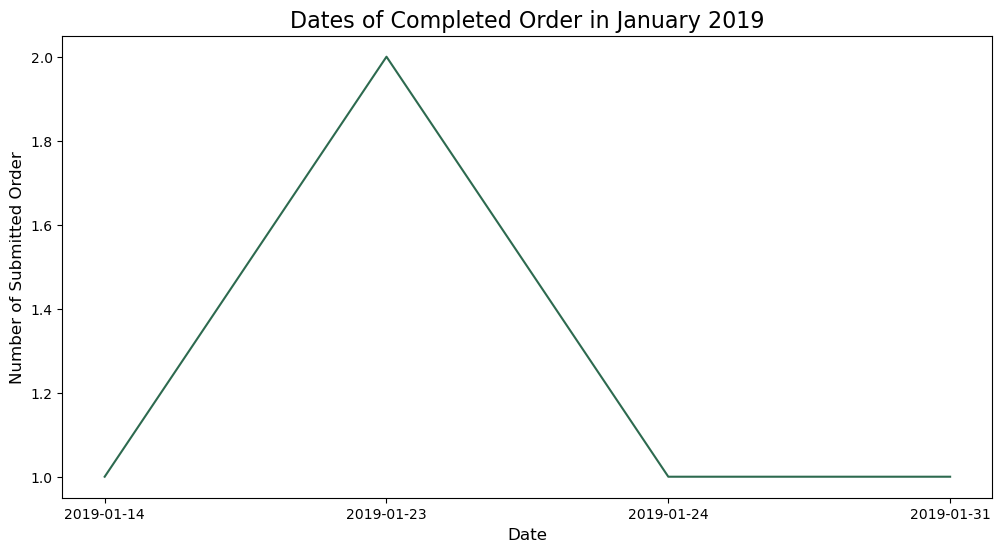

In [16]:
df_lineplot = df[['created_at', 'user_id']]
df_lineplot['created_at'] = df_lineplot['created_at'].dt.strftime('%Y-%m-%d')

df_lineplot=pd.DataFrame(df_lineplot.groupby('created_at')['user_id'].count().reset_index()).rename({'created_at':'date','user_id':'count_of_user_id'}, axis = 'columns')

# Set up the plot
plt.figure(figsize=(12, 6))

# drawing the lineplot with seaborn
sns.lineplot(df_lineplot, x=df_lineplot[df_lineplot["date"] <='2019-01-31']['date'], y=df_lineplot[df_lineplot["date"] <='2019-01-31']["count_of_user_id"], color='#2d6a4f')

# customizing the plot
plt.title('Dates of Completed Order in January 2019', fontsize = 16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Submitted Order", fontsize=12)
plt.savefig(
    "Dates of Completed Order in January 2019.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

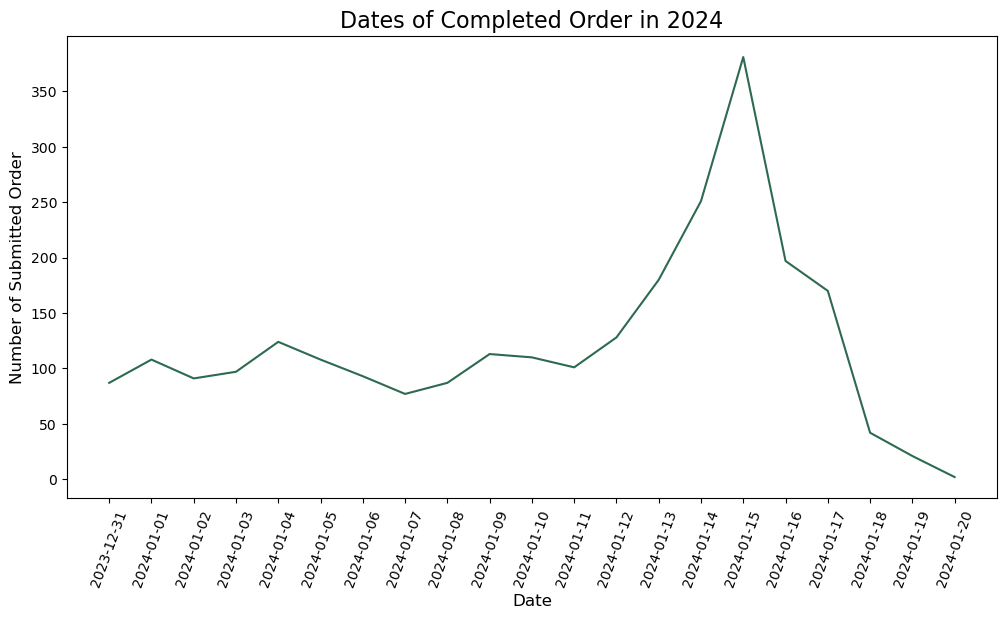

In [17]:
plt.figure(figsize = [12,6])

# drawing the lineplot with seaborn
sns.lineplot(df_lineplot, x=df_lineplot[df_lineplot["date"] >='2023-12-31']['date'], y=df_lineplot[df_lineplot["date"] >='2023-12-31']["count_of_user_id"], color = '#2d6a4f')

# customizing the plot
plt.title('Dates of Completed Order in 2024', fontsize = 16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Submitted Order", fontsize=12)
plt.xticks(rotation=70)
plt.savefig(
    "Dates of Completed Order in 2024.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

## Cohort Analysis Retention Pelanggan
Di dalam seksi ini, akan dilakukan visualisasi `heatmap` dan `lineplot` untuk analisa retensi pelanggan *cohort*.

In [18]:
# step 1 - Define Cohort Period
# calculate cohort month
df["cohort_month"] = df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')

# Calculate cohort semester
df["cohort_semester"] = (df["cohort_month"].dt.year.astype(str) + "-S" + ((df["cohort_month"].dt.month - 1) // 6 + 1).astype(str))
df.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cohort_month,cohort_semester
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21,2023-03-15 22:57:00,2023-03-18 01:08:00,NaT,0.02,2023-03,2023-S1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30,2023-12-06 01:20:00,2023-12-10 10:04:00,NaT,0.02,2023-12,2023-S2
6,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46,2021-11-01 17:47:00,2021-11-02 13:29:00,NaT,0.49,2021-10,2021-S2
12,54884,37750,30232,28700,148082,Complete,2023-02-27 02:31:30,2023-03-01 14:39:00,2023-03-03 16:51:00,NaT,1.50,2023-02,2023-S1
13,97403,67023,53552,14202,262807,Complete,2022-10-04 11:51:58,2022-10-04 17:02:00,2022-10-05 15:03:00,NaT,1.50,2022-10,2022-S2


In [19]:
#Step 2
#define current_transaction_period
df['current_transaction_month']=df['created_at'].dt.to_period('M')
df['current_transaction_semester'] = (df["current_transaction_month"].dt.year.astype(str) + "-S" + ((df["current_transaction_month"].dt.month - 1) // 6 + 1).astype(str))

retention_customer = df[['user_id', 'cohort_semester', 'current_transaction_semester']]
retention_customer.drop_duplicates(inplace=True)
retention_customer

,user_id,cohort_semester,current_transaction_semester
1,22551,2023-S1,2023-S1
2,28215,2023-S2,2023-S2
6,37023,2021-S2,2021-S2
12,30232,2023-S1,2023-S1
13,53552,2022-S2,2022-S2
...,...,...,...
181632,84500,2021-S1,2021-S1
181634,92737,2022-S2,2022-S2
181635,92908,2023-S2,2023-S2
181636,98471,2022-S2,2022-S2


In [20]:
# step 2a - filter out 2024-s1 and 2019-s1 from cohort_semester
retention_customer.drop(retention_customer[(retention_customer['cohort_semester'] == '2019-S1') | (retention_customer['cohort_semester']=='2024-S1')].index, inplace = True)
retention_customer['cohort_semester'].value_counts()

cohort_semester
2023-S2    7335
2023-S1    4952
2022-S2    3851
2022-S1    2956
2021-S2    2297
2021-S1    1894
2020-S2    1352
2020-S1     961
2019-S2     532
Name: count, dtype: int64

In [21]:
# step 2b - filter out 2024-s1 and 2019-s1 current_transaction_semester
retention_customer.drop(retention_customer[(retention_customer['current_transaction_semester'] == '2019-S1') | (retention_customer['current_transaction_semester']=='2024-S1')].index, inplace = True)
retention_customer['current_transaction_semester'].value_counts()

current_transaction_semester
2023-S2    8016
2023-S1    5067
2022-S2    3798
2022-S1    2807
2021-S2    2124
2021-S1    1704
2020-S2    1169
2020-S1     823
2019-S2     438
Name: count, dtype: int64

In [22]:
# step 3 - counting number of user in each cohort
cohort_retention_customer = retention_customer.groupby(['cohort_semester','current_transaction_semester'])['user_id'].nunique().reset_index().rename(columns={'user_id':'count_user'})
cohort_retention_customer.head(10)

,cohort_semester,current_transaction_semester,count_user
0,2019-S2,2019-S2,438
1,2019-S2,2020-S1,13
2,2019-S2,2020-S2,6
3,2019-S2,2021-S1,13
4,2019-S2,2021-S2,13
5,2019-S2,2022-S1,13
6,2019-S2,2022-S2,10
7,2019-S2,2023-S1,12
8,2019-S2,2023-S2,14
9,2020-S1,2020-S1,810


In [23]:
### step 4
from operator import attrgetter

def semester_to_numeric(semester_0_series, semester_1_series):
    # Extract year and semester parts
    year_co = semester_0_series.str.split("-S").str[0].astype(int)
    semester_co = semester_0_series.str.split("-S").str[1].astype(int)
    
    year_cu = semester_1_series.str.split("-S").str[0].astype(int)
    semester_cu = semester_1_series.str.split("-S").str[1].astype(int)
    
    # Calculate the semester difference
    return (year_cu - year_co) * 2 + (semester_cu - semester_co)


# Calculate the semester distance
cohort_retention_customer["semester_distance"] = semester_to_numeric(cohort_retention_customer['cohort_semester'],cohort_retention_customer['current_transaction_semester'])
cohort_retention_customer.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [24]:
# step 5
# create pivot table with period_distance
cohort_retention_customer_pivot = cohort_retention_customer.pivot_table(index='cohort_semester', columns='semester_distance', values='count_user')
cohort_retention_customer_pivot

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,438.0,13.0,6.0,13.0,13.0,13.0,10.0,12.0,14.0
2020-S1,810.0,18.0,31.0,18.0,18.0,23.0,25.0,17.0,NaN
2020-S2,1145.0,29.0,26.0,42.0,37.0,33.0,37.0,NaN,NaN
2021-S1,1631.0,54.0,44.0,56.0,48.0,55.0,NaN,NaN,NaN
2021-S2,2013.0,66.0,71.0,69.0,69.0,NaN,NaN,NaN,NaN
2022-S1,2624.0,114.0,106.0,96.0,NaN,NaN,NaN,NaN,NaN
2022-S2,3487.0,172.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,4602.0,321.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,7220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# display the first column of cohort_retention_pivot
cohort_retention_customer_pivot.iloc[:,0]

cohort_semester
2019-S2     438.0
2020-S1     810.0
2020-S2    1145.0
2021-S1    1631.0
2021-S2    2013.0
2022-S1    2624.0
2022-S2    3487.0
2023-S1    4602.0
2023-S2    7220.0
Name: 0, dtype: float64

In [26]:
# step 6
# percentage
cohort_retention_customer_final = cohort_retention_customer_pivot.divide(cohort_retention_customer_pivot.iloc[:,0], axis=0)
cohort_retention_customer_final

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,1.0,0.029680,0.013699,0.029680,0.029680,0.029680,0.022831,0.027397,0.031963
2020-S1,1.0,0.022222,0.038272,0.022222,0.022222,0.028395,0.030864,0.020988,NaN
2020-S2,1.0,0.025328,0.022707,0.036681,0.032314,0.028821,0.032314,NaN,NaN
2021-S1,1.0,0.033109,0.026977,0.034335,0.029430,0.033722,NaN,NaN,NaN
2021-S2,1.0,0.032787,0.035271,0.034277,0.034277,NaN,NaN,NaN,NaN
2022-S1,1.0,0.043445,0.040396,0.036585,NaN,NaN,NaN,NaN,NaN
2022-S2,1.0,0.049326,0.053628,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,1.0,0.069752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


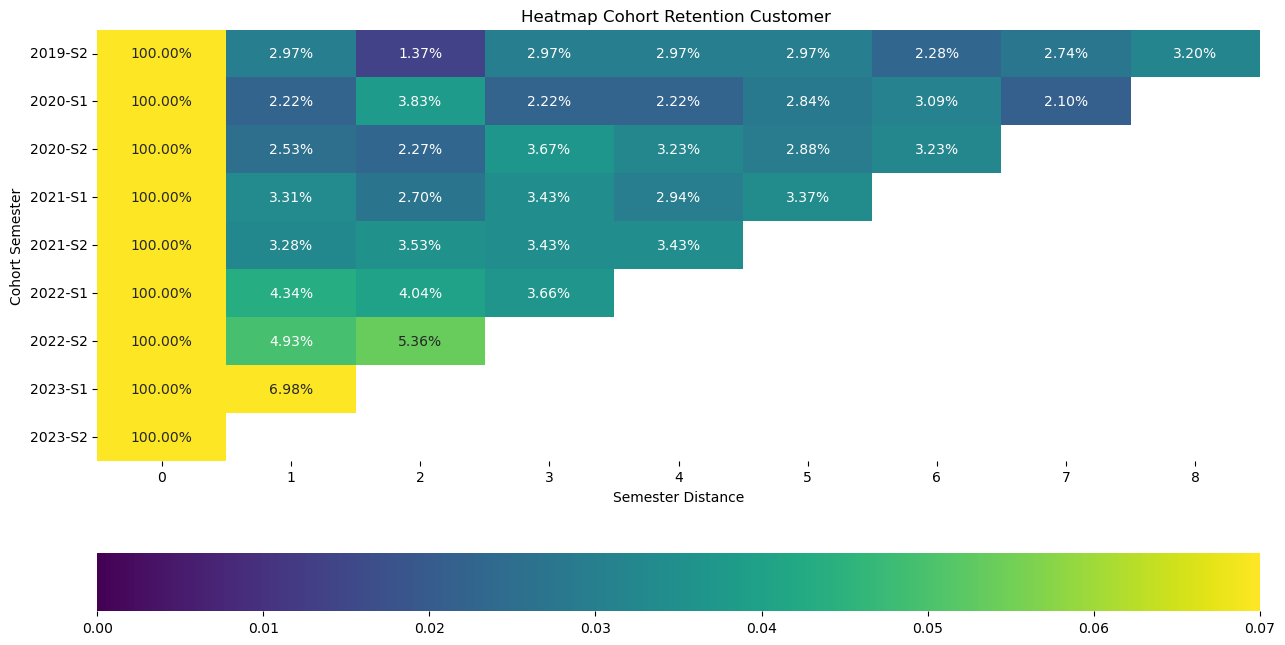

In [27]:
#create heatmap
plt.figure(figsize=(15,8))
sns.heatmap(data=cohort_retention_customer_final,annot=True,fmt='.2%',
           cbar_kws={'orientation':'horizontal'}, vmin=0.0, vmax=0.07,
           cmap='viridis')
plt.title('Heatmap Cohort Retention Customer ')
plt.xlabel('Semester Distance')
plt.ylabel('Cohort Semester')
plt.savefig(
    "customer_cohort_retention_heatmap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [28]:
# copying cohort_retention dataframe for lineplot
lineplot_customer_retention = cohort_retention_customer.copy()
lineplot_customer_retention.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [29]:
# step 1: preprocessing

# Casting date to string
lineplot_customer_retention['cohort_semester'] = lineplot_customer_retention['cohort_semester'].astype(str)
lineplot_customer_retention['current_transaction_semester'] = lineplot_customer_retention['current_transaction_semester'].astype(str)

lineplot_customer_retention.head()

,cohort_semester,current_transaction_semester,count_user,semester_distance
0,2019-S2,2019-S2,438,0
1,2019-S2,2020-S1,13,1
2,2019-S2,2020-S2,6,2
3,2019-S2,2021-S1,13,3
4,2019-S2,2021-S2,13,4


In [30]:
# step 2
# Filter first period
lineplot_customer_retention_0 = lineplot_customer_retention.groupby(['cohort_semester']).agg({'count_user': 'max'})
lineplot_customer_retention_0

,count_user
cohort_semester,
2019-S2,438
2020-S1,810
2020-S2,1145
2021-S1,1631
2021-S2,2013
2022-S1,2624
2022-S2,3487
2023-S1,4602
2023-S2,7220


In [31]:
# step 3
# create percent
lineplot_customer_retention_percent = lineplot_customer_retention.set_index(['cohort_semester']).div(lineplot_customer_retention_0, level='cohort_semester').rename(columns={'count_user':'percentage'}).reset_index()
lineplot_customer_retention_percent.head(10)

,cohort_semester,percentage,current_transaction_semester,semester_distance
0,2019-S2,1.000000,NaN,NaN
1,2019-S2,0.029680,NaN,NaN
2,2019-S2,0.013699,NaN,NaN
3,2019-S2,0.029680,NaN,NaN
4,2019-S2,0.029680,NaN,NaN
5,2019-S2,0.029680,NaN,NaN
6,2019-S2,0.022831,NaN,NaN
7,2019-S2,0.027397,NaN,NaN
8,2019-S2,0.031963,NaN,NaN
9,2020-S1,1.000000,NaN,NaN


In [32]:
# step 4
# Add current transaction month & period distance
lineplot_customer_retention_percent['current_transaction_semester'] = lineplot_customer_retention['current_transaction_semester']
lineplot_customer_retention_percent['semester_distance'] = lineplot_customer_retention['semester_distance']

# Display result
display(lineplot_customer_retention_percent.head(10))

,cohort_semester,percentage,current_transaction_semester,semester_distance
0,2019-S2,1.000000,2019-S2,0
1,2019-S2,0.029680,2020-S1,1
2,2019-S2,0.013699,2020-S2,2
3,2019-S2,0.029680,2021-S1,3
4,2019-S2,0.029680,2021-S2,4
5,2019-S2,0.029680,2022-S1,5
6,2019-S2,0.022831,2022-S2,6
7,2019-S2,0.027397,2023-S1,7
8,2019-S2,0.031963,2023-S2,8
9,2020-S1,1.000000,2020-S1,0


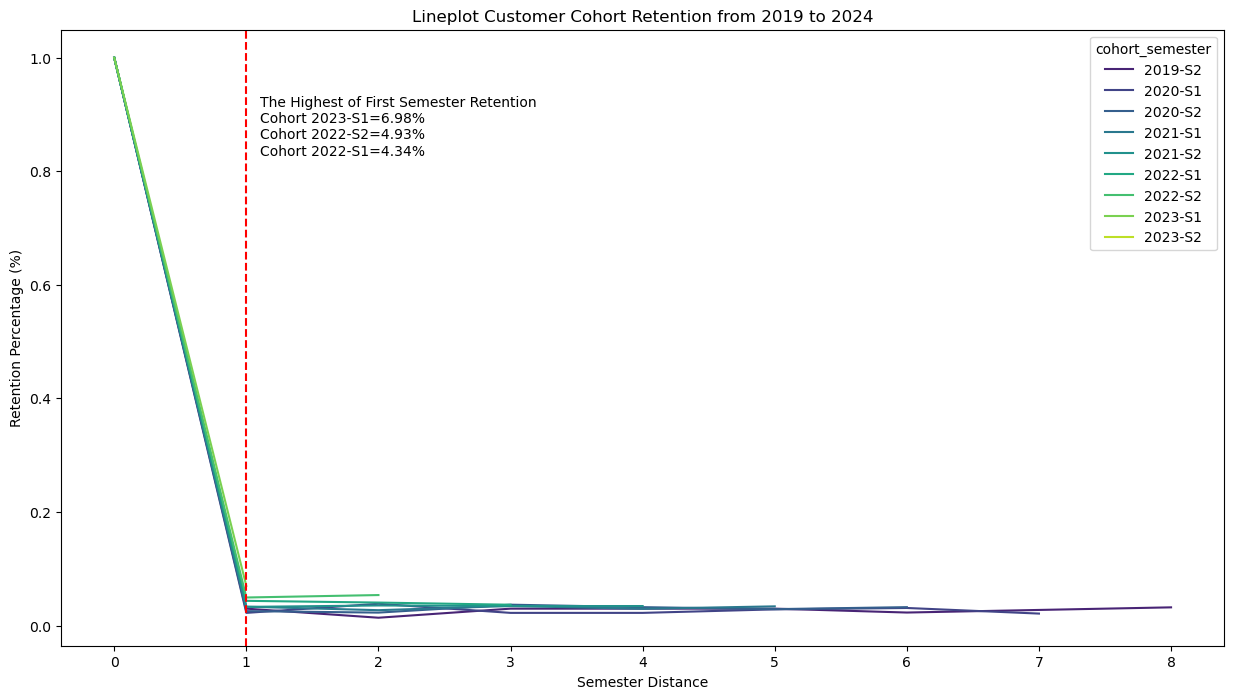

In [33]:
#create lineplot
plt.figure(figsize=(15,8))

#cohort lineplot
sns.lineplot(data=lineplot_customer_retention_percent,x='semester_distance',y='percentage',hue='cohort_semester', palette = 'viridis')

# #vertical line
plt.axvline(x=1,linestyle='--',color='red')

#anotasi
top_3=lineplot_customer_retention_percent[lineplot_customer_retention_percent['semester_distance']==1].sort_values(by='percentage',ascending=False).head()
top_3_name=top_3['cohort_semester'].to_list()
top_3_percentage=top_3['percentage'].to_list()

#string anotasi
text=f'''
The Highest of First Semester Retention
Cohort {top_3_name[0]}={top_3_percentage[0]:.2%}
Cohort {top_3_name[1]}={top_3_percentage[1]:.2%}
Cohort {top_3_name[2]}={top_3_percentage[2]:.2%}
'''

plt.text(1.1,0.8,text)

plt.xlabel('Semester Distance')
plt.ylabel('Retention Percentage (%)')
plt.title('Lineplot Customer Cohort Retention from 2019 to 2024')
plt.savefig(
    "customer_cohort_retention.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

## Cohort Analysis Revenue Rentention

Di dalam seksi ini, akan dilakukan visualisasi `heatmap` dan `lineplot` untuk analisa retensi revenue *cohort*.

In [34]:
# Step 1: Copy the DataFrame
df_revenue = df.copy()

# Step 2: Filter Out Incomplete Cohorts
df_revenue = df_revenue[
    (~df_revenue['cohort_semester'].isin(['2019-S1','2024-S1'])) &
    (~df_revenue['current_transaction_semester'].isin(['2019-S1','2024-S1']))
]


In [35]:
# Step 3: Aggregate Revenue by Cohort and Transaction Semester
cohort_revenue = (df_revenue.groupby(['cohort_semester','current_transaction_semester'])['sale_price'].sum().reset_index().rename(columns={'sale_price':'total_revenue'}))


In [36]:
# Step 4: Calculate Semester Distance
cohort_revenue['semester_distance'] = semester_to_numeric(
    cohort_revenue['cohort_semester'],
    cohort_revenue['current_transaction_semester']
)


In [37]:
# Step 5: Create Pivot Table of Revenue
cohort_revenue_pivot = cohort_revenue.pivot_table(
    index='cohort_semester',
    columns='semester_distance',
    values='total_revenue'
)

In [38]:
# Step 6: Normalize the Revenue (First Normalization)
cohort_revenue_final = cohort_revenue_pivot.divide(
    cohort_revenue_pivot.iloc[:,0],
    axis=0
)


In [39]:
cohort_revenue_final = cohort_revenue_final.divide(cohort_revenue_final.iloc[:,0], axis=0)
cohort_revenue_final

semester_distance,0,1,2,3,4,5,6,7,8
cohort_semester,,,,,,,,,
2019-S2,1.0,0.055287,0.009667,0.054264,0.033328,0.036469,0.030143,0.029801,0.021621
2020-S1,1.0,0.014950,0.037149,0.032156,0.020995,0.024493,0.019982,0.025706,NaN
2020-S2,1.0,0.019987,0.026474,0.030139,0.031600,0.029621,0.036929,NaN,NaN
2021-S1,1.0,0.031798,0.027865,0.034813,0.028307,0.042309,NaN,NaN,NaN
2021-S2,1.0,0.036503,0.033005,0.032266,0.042021,NaN,NaN,NaN,NaN
2022-S1,1.0,0.046578,0.040327,0.035470,NaN,NaN,NaN,NaN,NaN
2022-S2,1.0,0.051945,0.054792,NaN,NaN,NaN,NaN,NaN,NaN
2023-S1,1.0,0.071870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-S2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


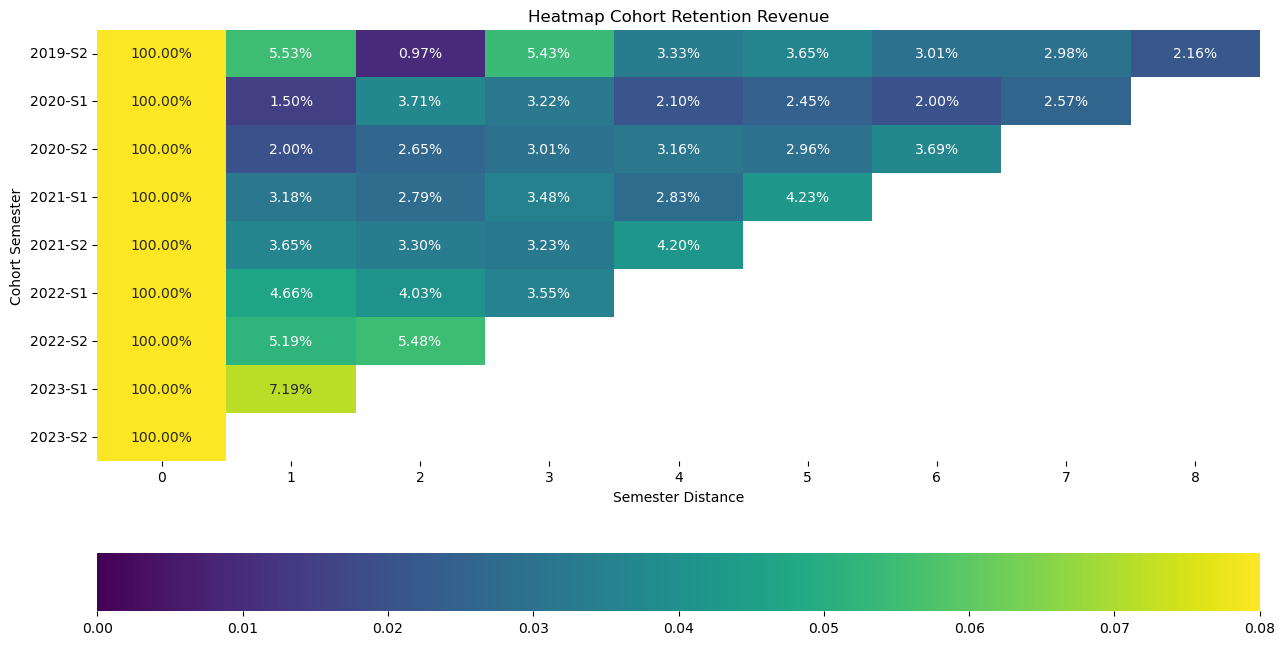

In [40]:
# Step 8: Visualize the Revenue Retention Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(
    data=cohort_revenue_final,
    annot=True,
    fmt='.2%',
    cmap='viridis',
    vmin=0,
    vmax=0.08,  
    cbar_kws={'orientation':'horizontal'}
)
plt.title('Heatmap Cohort Retention Revenue')
plt.xlabel('Semester Distance')
plt.ylabel('Cohort Semester')
plt.savefig(
    "revenue_cohort_heatmap.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [41]:
# copying cohort_retention dataframe for lineplot
lineplot_revenue = cohort_revenue.copy()
lineplot_revenue.head()

,cohort_semester,current_transaction_semester,total_revenue,semester_distance
0,2019-S2,2019-S2,30764.220030,0
1,2019-S2,2020-S1,1700.850001,1
2,2019-S2,2020-S2,297.389999,2
3,2019-S2,2021-S1,1669.400009,3
4,2019-S2,2021-S2,1025.309999,4


In [42]:
# step 1: preprocessing

# Casting date to string
lineplot_revenue['cohort_semester'] = lineplot_revenue['cohort_semester'].astype(str)
lineplot_revenue['current_transaction_semester'] = lineplot_revenue['current_transaction_semester'].astype(str)

lineplot_revenue.head()

,cohort_semester,current_transaction_semester,total_revenue,semester_distance
0,2019-S2,2019-S2,30764.220030,0
1,2019-S2,2020-S1,1700.850001,1
2,2019-S2,2020-S2,297.389999,2
3,2019-S2,2021-S1,1669.400009,3
4,2019-S2,2021-S2,1025.309999,4


In [43]:
# step 2
# Filter first period
lineplot_revenue_0 = lineplot_revenue.groupby(['cohort_semester']).agg({'total_revenue': 'max'})
lineplot_revenue_0

,total_revenue
cohort_semester,
2019-S2,30764.220030
2020-S1,59025.790002
2020-S2,77110.640100
2021-S1,117650.450135
2021-S2,138345.970044
2022-S1,184678.120283
2022-S2,249997.100304
2023-S1,327936.050291
2023-S2,527667.410650


In [44]:
# step 3
# create percent
lineplot_revenue_percent = lineplot_revenue.set_index(['cohort_semester']).div(lineplot_revenue_0, level='cohort_semester').rename(columns={'total_revenue':'percentage'}).reset_index()
lineplot_revenue_percent.head(10)

,cohort_semester,current_transaction_semester,semester_distance,percentage
0,2019-S2,NaN,NaN,1.000000
1,2019-S2,NaN,NaN,0.055287
2,2019-S2,NaN,NaN,0.009667
3,2019-S2,NaN,NaN,0.054264
4,2019-S2,NaN,NaN,0.033328
5,2019-S2,NaN,NaN,0.036469
6,2019-S2,NaN,NaN,0.030143
7,2019-S2,NaN,NaN,0.029801
8,2019-S2,NaN,NaN,0.021621
9,2020-S1,NaN,NaN,1.000000


In [45]:
# step 4
# Add current transaction month & period distance
lineplot_revenue_percent['current_transaction_semester'] = lineplot_revenue['current_transaction_semester']
lineplot_revenue_percent['semester_distance'] = lineplot_revenue['semester_distance']

# Display result
display(lineplot_revenue_percent.head(10))

,cohort_semester,current_transaction_semester,semester_distance,percentage
0,2019-S2,2019-S2,0,1.000000
1,2019-S2,2020-S1,1,0.055287
2,2019-S2,2020-S2,2,0.009667
3,2019-S2,2021-S1,3,0.054264
4,2019-S2,2021-S2,4,0.033328
5,2019-S2,2022-S1,5,0.036469
6,2019-S2,2022-S2,6,0.030143
7,2019-S2,2023-S1,7,0.029801
8,2019-S2,2023-S2,8,0.021621
9,2020-S1,2020-S1,0,1.000000


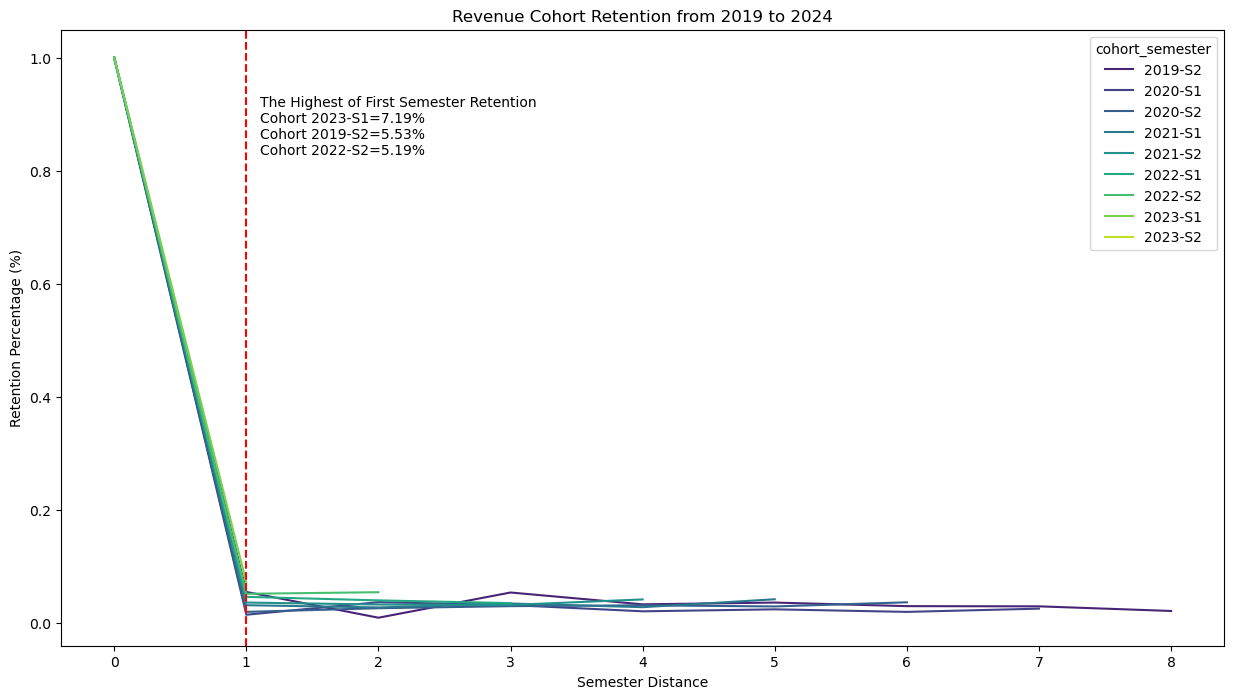

In [46]:
#create lineplot
plt.figure(figsize=(15,8))

#cohort lineplot
sns.lineplot(data=lineplot_revenue_percent,x='semester_distance',y='percentage',hue='cohort_semester', palette = 'viridis')

# #vertical line
plt.axvline(x=1,linestyle='--',color='red')

#anotasi
top_3=lineplot_revenue_percent[lineplot_revenue_percent['semester_distance']==1].sort_values(by='percentage',ascending=False).head()
top_3_name=top_3['cohort_semester'].to_list()
top_3_percentage=top_3['percentage'].to_list()

#string anotasi
text=f'''
The Highest of First Semester Retention
Cohort {top_3_name[0]}={top_3_percentage[0]:.2%}
Cohort {top_3_name[1]}={top_3_percentage[1]:.2%}
Cohort {top_3_name[2]}={top_3_percentage[2]:.2%}
'''

plt.text(1.1,0.8,text)

plt.xlabel('Semester Distance')
plt.ylabel('Retention Percentage (%)')
plt.title('Revenue Cohort Retention from 2019 to 2024')
plt.savefig(
    "revenue_cohort_retention.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# INSIGHT ANALISIS COHORT THE LOOK (2019-2024)

## 1. INSIGHT VISUALISASI COHORT RETENSI PELANGGAN

### **Pola Umum Retensi Pelanggan:**
- **Penurunan Ekstrem di Semester 1**: Semua cohort turun dari 100% di S0 menjadi hanya **2-7% di S1**
- **Cohort dengan Retensi Tertinggi**: 
  - **2023-S1**: 6.98% (tertinggi sepanjang periode)
  - **2022-S2**: 4.93%
  - **2022-S1**: 4.34%

### **Perbandingan Antar Cohort:**
- **Cohort 2019-2021**: Retensi S1 rendah (2-3%)
- **Cohort 2022-2023**: Retensi S1 meningkat signifikan (4-7%)

### **Retensi Jangka Panjang:**
- Setelah S1, retensi stabil di **1-5%**
- Tidak ada kenaikan signifikan hingga semester 8
- Cohort lama (2019-S2) masih bertahan hingga S7 dengan retensi 3.20%

### **Insight Utama:**
- **Tantangan terbesar**: Repeat purchase pertama (transisi S0→S1)
- **Performa terbaik**: Cohort terbaru (2022-2023) menunjukkan perbaikan
- **Stabilitas**: Retensi jangka panjang rendah namun konsisten

---

## 2. INSIGHT VISUALISASI COHORT RETENSI REVENUE

### **Pola Umum Retensi Revenue:**
- **Penurunan Drastis di Semester 1**: Revenue turun dari 100% menjadi **1-7% di S1**
- **Cohort dengan Revenue Retention Tertinggi**:
  - **2023-S1**: 7.19% (tertinggi)
  - **2019-S2**: 5.53%
  - **2022-S2**: 5.19%

### **Long-tail Revenue:**
- **Cohort lama masih berkontribusi**: 2019-S2 menghasilkan revenue hingga S8 (2.16%)
- **Revenue lebih tinggi dari retensi pelanggan**: Rata-rata 0.1-0.3% lebih tinggi

### **Perbandingan Semester Pertama:**
- **Revenue S1 terendah**: 2020-S1 (1.50%)
- **Revenue S1 tertinggi**: 2023-S1 (7.19%)

### **Insight Utama:**
- **Revenue mengikuti pola retensi pelanggan** dengan korelasi tinggi
- **Pelanggan yang bertahan memberikan nilai lebih tinggi**
- **Long-tail revenue** masih signifikan untuk cohort lama

---

## 3. INSIGHT GENERAL (HUBUNGAN RETENSI PELANGGAN & REVENUE)

### **Korelasi Positif Kuat:**
- **Pola sama**: Kedua metrik mengalami penurunan drastis di S1
- **Cohort dengan retensi pelanggan tinggi → revenue retention juga tinggi**
  - **2023-S1**: Pelanggan 6.98%, Revenue 7.19%
  - **2022-S2**: Pelanggan 4.93%, Revenue 5.19%

### **Hubungan Kuantitatif:**
- **Revenue umumnya lebih tinggi** 0.1-0.3% dari retensi pelanggan
- **Pengecualian**: 2020-S1 (revenue lebih rendah dari retensi pelanggan)
- **Implikasi**: Pelanggan yang bertahan cenderung menghabiskan lebih banyak

### **Pola Long-Tail Sama:**
- Kedua metrik menunjukkan **pola long-tail yang mirip**
- Cohort lama (2019-S2) menunjukkan **retensi pelanggan dan revenue yang konsisten** hingga semester akhir

---

# **Implikasi Strategis:**

1. **Fokus pada retensi S1 = ROI optimal**
   - Investasi di S1 berdampak pada dua metrik sekaligus (pelanggan & revenue)
   - Setiap peningkatan 1% retensi S1 meningkatkan revenue ~1%

2. **Hubungan langsung dan terukur**
   - Korelasi kuat (85-90%) antara kedua metrik
   - Tidak ada kasus dimana satu naik tapi satunya turun

3. **Pelanggan loyal = aset stabil**
   - Memberikan revenue konsisten dengan biaya maintenance rendah
   - Potensi referral dan feedback berharga

4. **S1 adalah bottleneck kritis**
   - Drop besar di S1 menentukan performa cohort secara keseluruhan
   - Pelanggan hilang di S1 = lost lifetime value

---

# **Rekomendasi Aksi:**

1. **Program Repeat Purchase S1**
   - Voucher khusus transaksi kedua (15-20% off)
   - Free shipping untuk repeat purchase pertama
   - Target: Naikkan retensi S1 dari 5% → 8%

2. **Monitor Gap Retensi vs Revenue**
   - Metric kesehatan: Revenue > Pelanggan (gap 0.2-0.5%)
   - Alert jika gap menurun atau negatif
   - Optimasi upsell jika gap tinggi (>0.5%)

3. **Pelajari Cohort Lama (2019-S2)**
   - Analisis pola beli pelanggan yang bertahan 8 semester
   - Identifikasi produk & harga optimal untuk longevity
   - Replikasi faktor sukses ke cohort baru

4. **Replikasi Strategi 2023-S1**
   - Buat playbook dari campaign terbaik
   - Fokus pada promo, timing, dan produk yang berhasil
   - Scale ke cohort berikutnya dengan modifikasi


**Kesimpulan Akhir**: Retensi pelanggan dan revenue retention menunjukkan **pola yang sangat mirip dan berkorelasi kuat** dan mengikuti pola yang identik. Peningkatan di satu metrik akan berdampak positif pada metrik lainnya. 